In [1]:
import numpy as np 

In [2]:
import pandas as pd 

In [9]:
import os 
for dirname,filename in os.walk('/dataset.csv'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

In [10]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [11]:
df=pd.read_csv('/dataset.csv')
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [13]:
df.shape

(22000, 2)

In [14]:
df.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


In [15]:
df=df.iloc[:6000,:]

In [16]:
df.shape

(6000, 2)

In [18]:
df['language'].value_counts()

Russian       288
Persian       285
Japanese      284
Arabic        278
Swedish       278
Hindi         278
Turkish       278
French        276
Dutch         275
English       275
Indonesian    274
Thai          274
Portugese     273
Korean        270
Spanish       270
Tamil         270
Pushto        269
Estonian      267
Urdu          263
Latin         261
Chinese       259
Romanian      255
Name: language, dtype: int64

In [19]:
X=df['Text']
y=df['language']

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y= le.fit_transform(y)

In [23]:
data_list = []

for text in X:
       
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        
        text = text.lower()
        data_list.append(text)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(6000, 102337)

In [25]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)


MultinomialNB()

In [27]:
y_pred = model.predict(x_test)


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9325


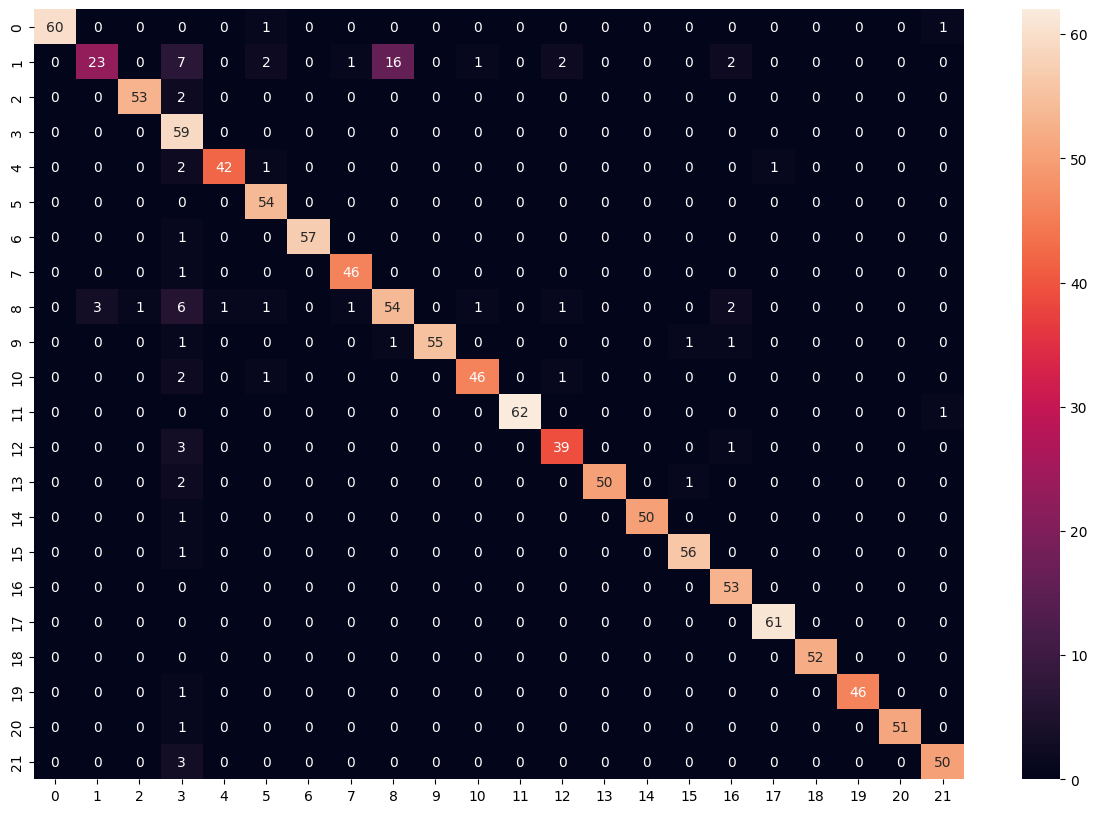

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()


In [30]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0])


In [38]:
predict("என் பெயர் கேசவ்")

The langauge is in Tamil


In [39]:
predict("my name is Keshav")

The langauge is in English


In [40]:
predict("Jag heter Keshav")

The langauge is in Swedish


In [41]:
predict("मेरा नाम केशव है")

The langauge is in Hindi


In [42]:
predict("اسمي كيشاف")

The langauge is in Arabic
